Instalacion H5PY para guardar en formato binario el modelo

In [0]:
!pip install h5py

Montamos la unidad de Drive e importamos algunos paquete necesarios para la ejecucion

In [0]:
import numpy as np
import gzip
import pickle
from google.colab import drive
from pathlib import Path
from keras.models import model_from_json

drive.mount( '/content/drive' )

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Metodo para leer los subdirectorios de una ruta

In [0]:
def ls( ruta = Path.cwd() ):
    return [ arch.name for arch in Path(ruta).iterdir() if arch.is_file() ]

X_train

In [0]:
X_train = list()
with open( "/content/drive/My Drive/Colab Notebooks/TPFinal/dataset.txt", "r" ) as file:
  line = file.readline()
  while ( line != '' ):
    ruta  = "/content/drive/My Drive/Cohn-kanade-dataset/" + str( line[:4] ) + '/' + str( line[5:8] ) + '/'
    lista = ls( ruta )
    for i in range(len(lista)-5 , len(lista) ):
      if( i != len(lista)-1 ):       
        img = cv2.resize(cv2.imread( ruta + lista[i] ), (48,48) )
        X_train.append( img/255 )
    line = file.readline()

with gzip.open( "/content/drive/My Drive/Colab Notebooks/TPFinal/X_train-5.pkl.gz", "wb" ) as of:
	pickle.dump(np.array(X_train,dtype='float32'),of, pickle.HIGHEST_PROTOCOL)

y_train

In [0]:
y_train = list()
with open("/content/drive/My Drive/Colab Notebooks/TPFinal/dataset.txt","r") as file:
    line = file.readline()
    while ( line != '' ):
        ruta  = "/content/drive/My Drive/Cohn-kanade-dataset/" + str( line[:4] ) + '/' + str( line[5:8] ) + '/'
        lista = ls( ruta )
        for i in range(len(lista)-5 , len(lista) ):
          if( i != len(lista)-1 ):       
            y_train.append( (int) (line[9:]) )
        line = file.readline()
        
with gzip.open("/content/drive/My Drive/Colab Notebooks/TPFinal/y_train.pkl.gz","wb") as of:
	pickle.dump(np_utils.to_categorical(y_train),of, pickle.HIGHEST_PROTOCOL)


X_test

In [0]:
X_train = list()
with open( "/content/drive/My Drive/Colab Notebooks/TPFinal/dataset.txt", "r" ) as file:
  line = file.readline()
  while ( line != '' ):
    ruta  = "/content/drive/My Drive/Cohn-kanade-dataset/" + str( line[:4] ) + '/' + str( line[5:8] ) + '/'
    lista = ls( ruta )
    for i in range(len(lista)-5 , len(lista) ):
      if( i == len(lista)-1 ):       
        img = cv2.resize( cv2.imread( ruta + lista[i] ), (48,48) )
        X_train.append( img/255 )
    line = file.readline()

with gzip.open( "/content/drive/My Drive/Colab Notebooks/TPFinal/X_train-5.pkl.gz", "wb" ) as of:
	pickle.dump(np.array(X_train,dtype='float32'),of, pickle.HIGHEST_PROTOCOL)

y_test

In [0]:
y_train = list()
with open( "/content/drive/My Drive/Colab Notebooks/TPFinal/dataset.txt", "r" ) as file:
    line = file.readline()
    while ( line != '' ):
        ruta  = "/content/drive/My Drive/Cohn-kanade-dataset/" + str( line[:4] ) + '/' + str( line[5:8] ) + '/'
        lista = ls( ruta )
        for i in range(len(lista)-5 , len(lista) ):
          if( i == len(lista)-1 ):       
            y_train.append( (int) (line[9:]) )
        line = file.readline()
        
with gzip.open( "/content/drive/My Drive/Colab Notebooks/TPFinal/y_train.pkl.gz", "wb" ) as of:
	pickle.dump(np_utils.to_categorical(y_train),of, pickle.HIGHEST_PROTOCOL)

Eliminamos las varaibles

In [0]:
del(X_train)
del(y_train)
del(img)
del(ruta)
del(lista)
del(line)

Levantamos X_train e y_train previamente procesados

In [0]:
from keras.utils import np_utils
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding
from keras.optimizers import SGD, adam

X_train, y_train = list(),list()

f = gzip.open( "/content/drive/My Drive/Colab Notebooks/TPFinal/X_train-5.pkl.gz", 'rb' )
X_train = pickle.load(f)
f.close()

f = gzip.open( "/content/drive/My Drive/Colab Notebooks/TPFinal/y_train.pkl.gz", 'rb' )
y_train = pickle.load(f)
f.close()

  
X_train = np.array( X_train, dtype = 'float32' )
y_train = np.array( y_train, dtype = 'int16' )

print( X_train.shape )
print( y_train.shape )

(1308, 48, 48, 3)
(1308, 7)


Modulo para saca las caracteristicas de cada imagen

In [0]:
vgg16 = VGG16( include_top = False, input_shape = (48, 48, 3), weights = 'imagenet' )

def get_vgg16_output( vgg16, array_input, n ):
  picture_train_features = vgg16.predict( array_input )
  feature_map = np.empty( [n, 512] )
  for idx_pic, picture in enumerate( picture_train_features ):
      feature_map[idx_pic] = picture
  return feature_map

x_train = get_vgg16_output( vgg16, X_train, len(X_train) )
print( x_train.shape )

W0624 16:32:14.955240 140643546699648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 3s 0us/step
(1308, 512)


Modelo

In [0]:
Model = Sequential()
Model.add( Dense( 256, input_shape = (512,), activation = 'relu' ) )
Model.add( Dense( 256, input_shape = (256,), activation = 'relu' ) )
Model.add( Dropout( 0.5 ) )
Model.add( Dense( 128, input_shape = (256,), activation = 'relu' ) )
Model.add( Dense( 7, activation = 'softmax' ) )

Model.compile( loss = 'categorical_crossentropy', optimizer = adam(), metrics = ['accuracy'] )
Model.fit( x_train, y_train, validation_data = ( x_train, y_train ), epochs = 35, batch_size = 10 )  

Train on 1308 samples, validate on 1308 samples
Epoch 1/35
1308/1308 [==============================] - 1s 883us/step - loss: 1.8117 - acc: 0.2607 - val_loss: 1.6720 - val_acc: 0.3502
Epoch 2/35
1308/1308 [==============================] - 1s 514us/step - loss: 1.5978 - acc: 0.3647 - val_loss: 1.4725 - val_acc: 0.3708
Epoch 3/35
1308/1308 [==============================] - 1s 504us/step - loss: 1.4339 - acc: 0.4450 - val_loss: 1.1991 - val_acc: 0.5413
Epoch 4/35
1308/1308 [==============================] - 1s 505us/step - loss: 1.2341 - acc: 0.5183 - val_loss: 1.1322 - val_acc: 0.5229
Epoch 5/35
1308/1308 [==============================] - 1s 504us/step - loss: 1.0486 - acc: 0.5887 - val_loss: 0.7876 - val_acc: 0.7209
Epoch 6/35
1308/1308 [==============================] - 1s 518us/step - loss: 0.9233 - acc: 0.6430 - val_loss: 0.7190 - val_acc: 0.7508
Epoch 7/35
1308/1308 [==============================] - 1s 500us/step - loss: 0.7469 - acc: 0.7171 - val_loss: 0.6387 - val_acc: 0.7615


In [0]:
Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 903       
Total params: 230,919
Trainable params: 230,919
Non-trainable params: 0
_________________________________________________________________


Levantamos X_train e y_train previamente procesados

In [0]:
X_test, y_test = list(),list()

f = gzip.open("/content/drive/My Drive/Colab Notebooks/TPFinal/X_test-5.pkl.gz", 'rb')
X_test = pickle.load(f)
f.close()

f = gzip.open("/content/drive/My Drive/Colab Notebooks/TPFinal/y_test.pkl.gz", 'rb')
y_test = pickle.load(f)
f.close()
  
X_test = np.array( X_test, dtype = 'float32' )
y_test = np.array( y_test, dtype = 'int16' )

print( X_test.shape )
print( y_test.shape )

x_test = get_vgg16_output(vgg16, X_test, len( X_test ) )

(327, 48, 48, 3)
(327, 7)


Prueba y precision

In [0]:
scores = Model.evaluate( x_test ,y_test )
print( "\n%s: %.2f%%" %( Model.metrics_names[1], scores[1] * 100 ) )
print( Model.metrics_names )
print( scores )

327/327 [==============================] - 0s 79us/step

acc: 98.17%
['loss', 'acc']
[0.06670617373711472, 0.9816513763290662]


Matriz de confucion

In [0]:
y_pred = Model.predict_classes ( x_test )
print( x_test.shape )

y_classes = [ np.argmax( y, axis=None, out=None ) for y in y_test ] 

n_columns = n_row = 7
matrix = [ [0] * n_columns for i in range(n_row) ]
matrix = np.array( matrix )
for k in range( len( y_pred ) ):
  matrix[ int(y_classes[k]) ][ int(y_pred[k]) ] += 1 
print( matrix )
print ( "Precision: " + str( float( np.trace( np.array( matrix ) ) ) / len(y_pred) ) )

(327, 512)
[[44  0  0  0  0  1  0]
 [ 0 18  0  0  0  0  0]
 [ 0  0 59  0  0  0  0]
 [ 0  0  0 25  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  0  0  0  0 28  0]
 [ 2  0  1  0  1  1 78]]
Precision: 0.981651376146789


Modulo para guardar y levantar el modelo

In [0]:
from keras.models import model_from_json

model_json = Model.to_json()
with open( "/content/drive/My Drive/Colab Notebooks/TPFinal/model.json", "w" ) as json_file:
  json_file.write( model_json )
  
#serializan los pesos (weights) para HDF5
Model.save_weights( "/content/drive/My Drive//Colab Notebooks/TPFinal/model.h5" )
print( "Modelo guardado en el PC" )

Modelo guardado en el PC
Modelo cargado desde el PC
acc: 98.17%


In [0]:
json_file = open( '/content/drive/My Drive/Colab Notebooks/Resguardo/model.json', 'r' )
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights( "/content/drive/My Drive/Colab Notebooks/Resguardo/model.h5" )
print( "Modelo cargado desde el PC" )

W0624 16:30:40.671652 140643546699648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 16:30:40.726529 140643546699648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0624 16:30:40.767657 140643546699648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0624 16:30:40.769287 140643546699648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0624 16:30:40.785321

Modelo cargado desde el PC


In [0]:
# se evalua el modelo cargado con los datos de los test
loaded_model.compile( loss = 'categorical_crossentropy', optimizer = adam(), metrics=['accuracy'] )

score = loaded_model.evaluate( x_test, y_test, verbose = 0 )
print("%s: %.2f%%" % ( loaded_model.metrics_names[1], score[1]*100 ) )

acc: 98.17%


Prueba del modulo anterior

In [0]:
pred = loaded_model.predict_classes( x_test )
n_columns = n_row = 7
confusion = [ [0] * n_columns for i in range(n_row) ]
confusion = np.array( confusion )
for k in range( len(y_pred) ):
  confusion[ int(y_classes[k]) ][ int(pred[k]) ] += 1
print( confusion )
print( "Precision: " + str( float( np.trace( np.array( confusion ) ) ) / len(pred) ) )

[[44  0  0  0  0  1  0]
 [ 0 18  0  0  0  0  0]
 [ 0  0 59  0  0  0  0]
 [ 0  0  0 25  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  0  0  0  0 28  0]
 [ 2  0  1  0  1  1 78]]
Precision: 0.981651376146789


Pruebas Aleatorias

Emocion: Miedo


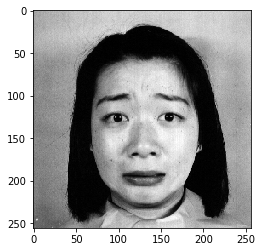

Emocion: Miedo


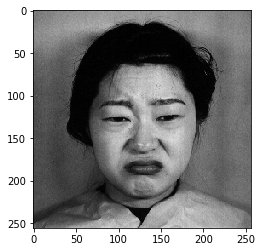

Emocion: Desprecio


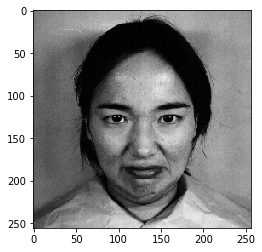

Emocion: Sorpresa


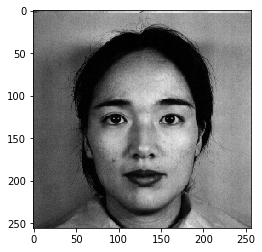

In [0]:
import cv2
from google.colab.patches import cv2_imshow

diccionary = { 0:'Enojo', 1:'Desprecio', 2:'Disgusto', 3:'Miedo', 4:'Alegria', 5:'Tristeza', 6:'Sorpresa' }
X_test = list()
view = []
d = []
path = "/content/drive/My Drive/Prueba/"
for img in ls(path):
  view.append( cv2.imread( path+img ) ) 
  X_test.append( cv2.resize( cv2.imread( path+img ), (48,48) )/255 )

X_test = np.array( X_test, dtype = 'float32' )
x_test = get_vgg16_output(vgg16, X_test, len( X_test ) )
pred = loaded_model.predict_classes( x_test )

from matplotlib import pyplot as plt
for i in range( len(pred) ):
  print( "Emocion: "+ diccionary[pred[i]])
  plt.imshow(view[i])
  plt.show()